In [17]:
# 12_efficiency_dashboards.ipynb
# 📊 One-Page Team Efficiency Dashboards

# 🛠 Requirements: pandas, matplotlib, seaborn, numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 8)

DATA_DIR = "./data"

In [ ]:
# 📂 Load 2023 advanced season stats

stats_path = os.path.join(DATA_DIR, "advanced_season_stats", "2023.csv")
stats = pd.read_csv(stats_path)
stats = stats[stats["conference"].notnull()].copy()

In [14]:
# 🎯 Pick a team to explore

team = "Michigan"  # Change this to any FBS team
row = stats[stats["team"] == team].squeeze()

if row.empty:
    raise ValueError(f"{team} not found in dataset.")

In [15]:
# 🎯 Select metrics and load team stats

offense_metrics = [
    "offense_ppa", "offense_successRate", "offense_explosiveness",
    "offense_standardDowns_ppa", "offense_passingDowns_ppa", 
    "offense_lineYards", "offense_stuffRate"
]

defense_metrics = [
    "defense_ppa", "defense_successRate", "defense_explosiveness",
    "defense_standardDowns_ppa", "defense_passingDowns_ppa", 
    "defense_lineYards", "defense_stuffRate"
]

summary = {
    "Team": team,
    **{k: row[k] for k in offense_metrics + defense_metrics}
}

pd.DataFrame(summary.items(), columns=["Metric", "Value"])

,Metric,Value
0,Team,Michigan
1,offense_ppa,0.289624
2,offense_successRate,0.474373
3,offense_explosiveness,1.210472
4,offense_standardDowns_ppa,0.238175
5,offense_passingDowns_ppa,0.425392
6,offense_lineYards,3.145624
7,offense_stuffRate,0.137803
8,defense_ppa,-0.008876
9,defense_successRate,0.343458


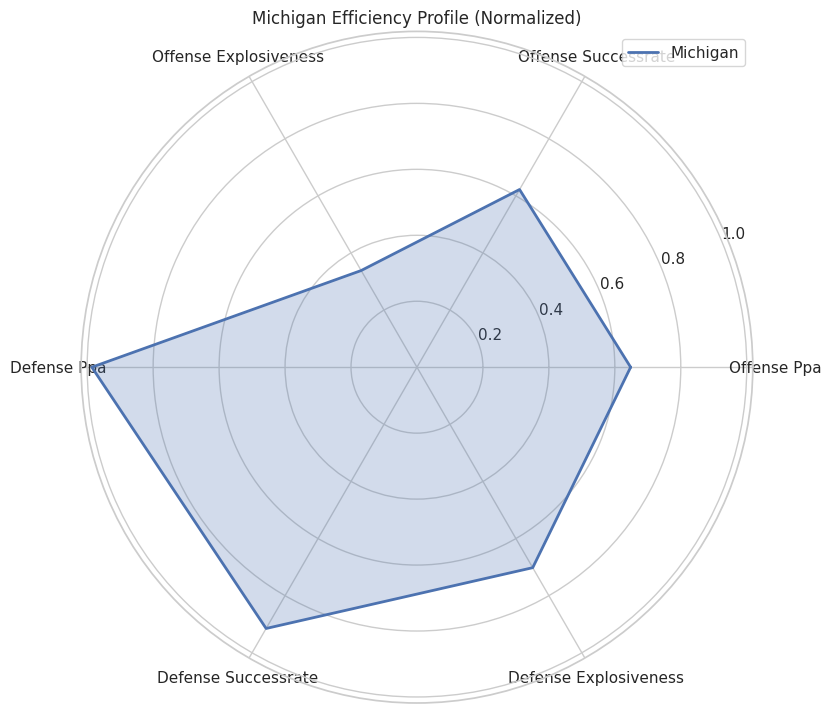

In [16]:
from math import pi
from sklearn.preprocessing import MinMaxScaler

# Combine selected metrics and normalize across all teams
metrics = offense_metrics[:3] + defense_metrics[:3]  # trim for readability

data = stats[["team"] + metrics].copy()
scaler = MinMaxScaler()

# Define which metrics should be inverted
invert_metrics = [m for m in metrics if m.startswith("defense_") or "stuffRate" in m or "havoc" in m]

# Invert these metrics (multiply by -1)
data_adj = data.copy()
data_adj[metrics] = data_adj[metrics].apply(lambda col: -col if col.name in invert_metrics else col)

# Normalize so that higher is always better
data_adj[metrics] = scaler.fit_transform(data_adj[metrics])

team_data = data_adj[data_adj["team"] == team].squeeze()

# Radar chart setup
categories = metrics
values = [team_data[m] for m in categories]
values += values[:1]  # close the circle

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label=team)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([m.replace("_", " ").title() for m in categories])
ax.set_title(f"{team} Efficiency Profile (Normalized)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# ✅ Summary

# In this notebook, you:
# - Selected a team and extracted its efficiency metrics
# - Built a one-page table of key stats
# - Visualized strengths and weaknesses on a radar chart
# - (Optionally) saved your dashboard to file

# 🧪 Try This:
# - Add percentile rank columns to the table
# - Build dashboards for all teams in a loop
# - Export a PDF or HTML report of all teams
